In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import folium
%matplotlib inline

In [ ]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [ ]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [ ]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

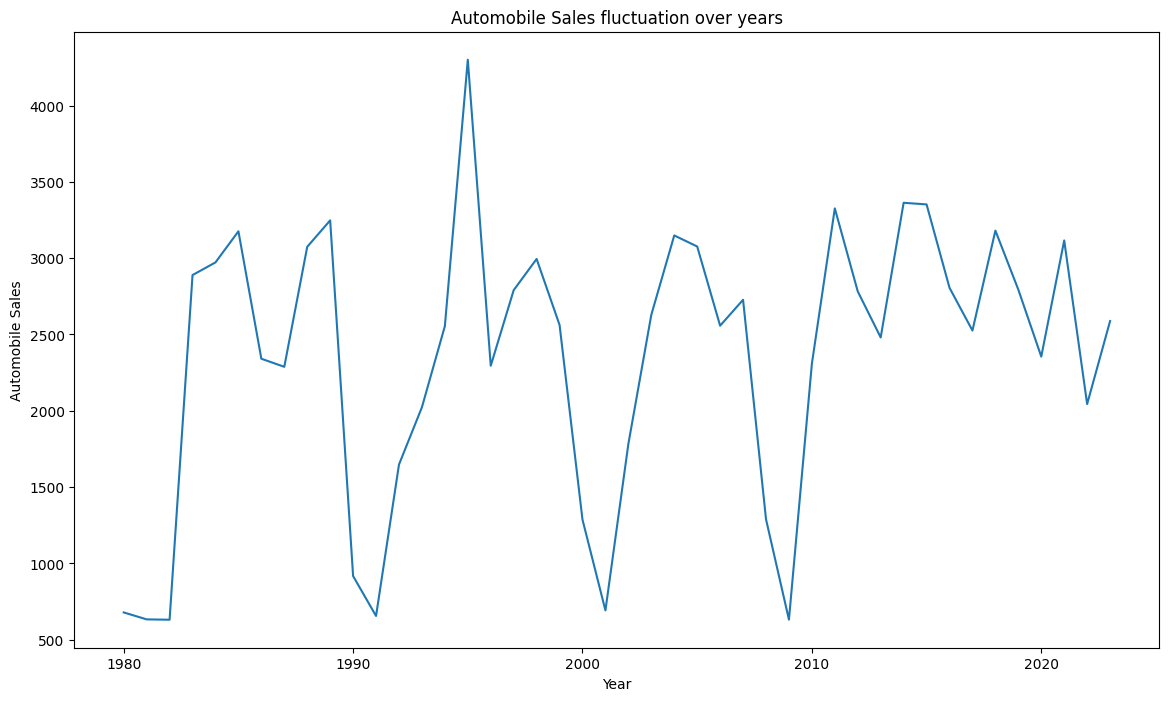

In [ ]:
data1 = df.groupby('Year')['Automobile_Sales'].mean()
data1.plot(x='Year',y = 'Automobile_Sales',figsize=(14,8))
plt.title('Automobile Sales fluctuation over years')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.show()

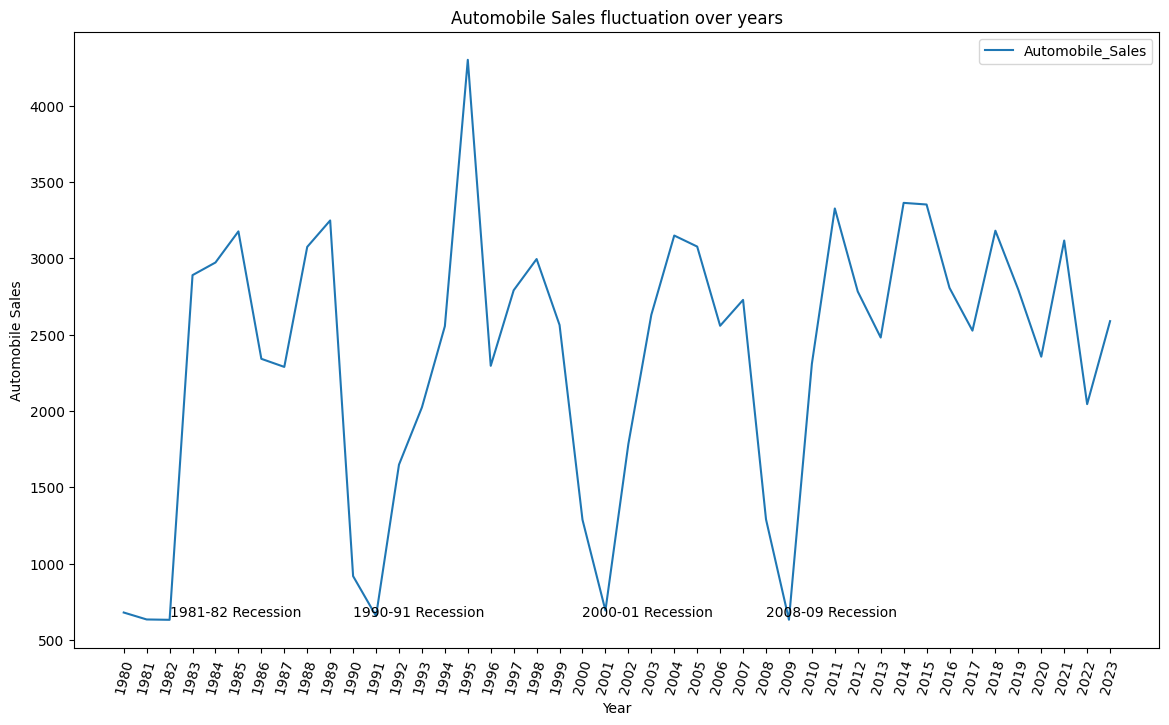

In [ ]:
data1.plot(x='Year',y = 'Automobile_Sales',figsize=(14,8))
plt.xticks(list(range(1980,2024)),rotation=75)
plt.title('Automobile Sales fluctuation over years')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.text(1982,650,'1981-82 Recession')
plt.text(1990,650,'1990-91 Recession')
plt.text(2000,650,'2000-01 Recession')
plt.text(2008,650,'2008-09 Recession')
plt.legend()
plt.show()

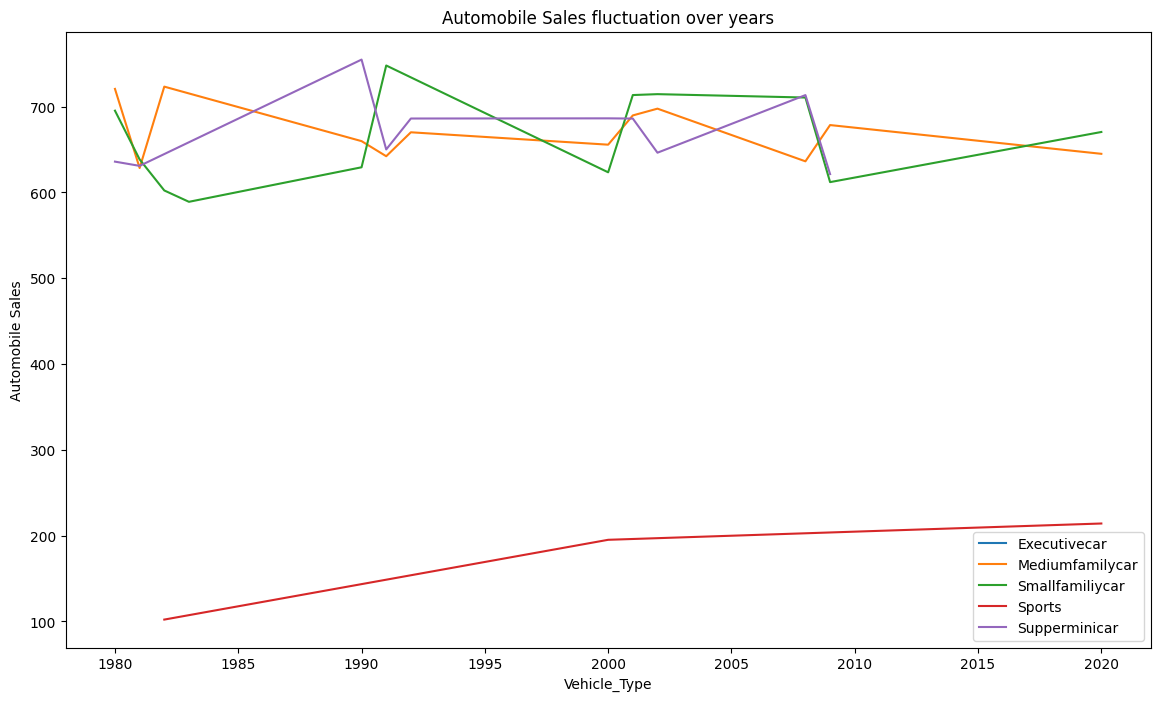

In [ ]:
data2 = df[df['Recession']==1]
data2 = data2.groupby(['Vehicle_Type','Year'],as_index=False)['Automobile_Sales'].mean()
data2.set_index('Year',inplace=True)
data2 = data2.groupby('Vehicle_Type')['Automobile_Sales']
data2.plot(kind='line',figsize=(14,8))
plt.xlabel('Vehicle_Type')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales fluctuation over years')
plt.legend()
plt.show()

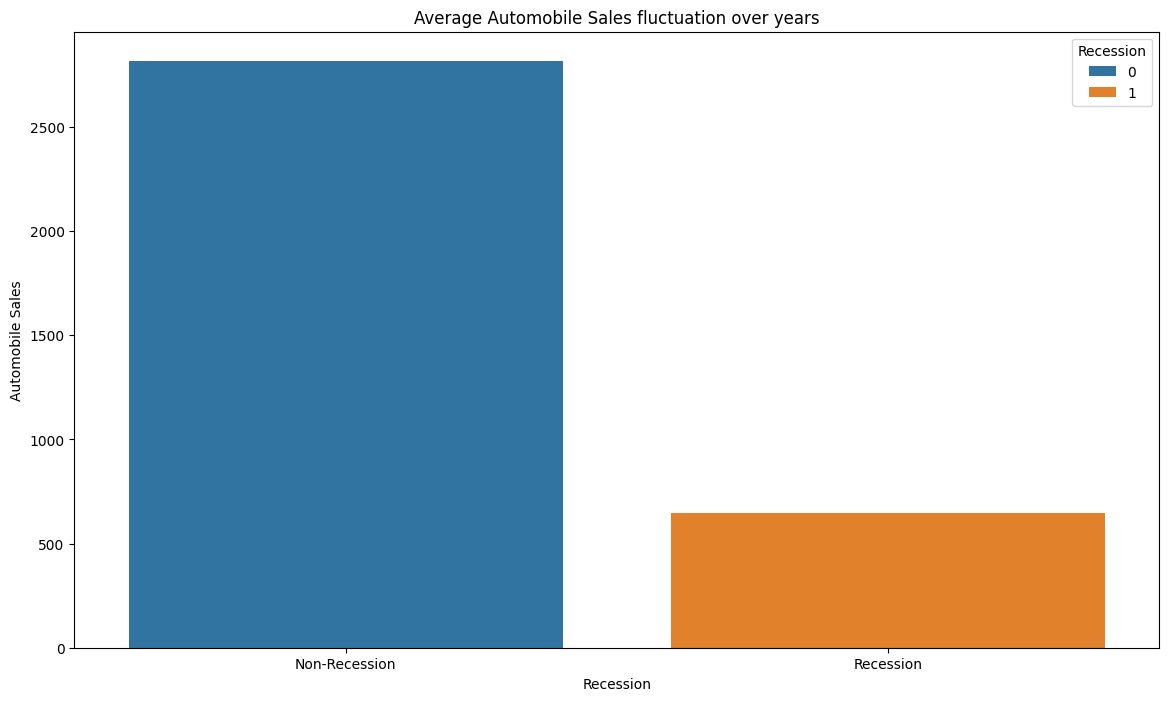

In [ ]:
data3 = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
data3.set_index('Recession',inplace=True)
plt.figure(figsize=(14,8))
sns.barplot(x='Recession',y='Automobile_Sales',hue='Recession',data=data3)
plt.xlabel('Recession')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales fluctuation over years')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

Inference: From this plot, we can understand that during recession period, the sales for 'Sports type vehicles' declined because of the high cost of the vehicle.
while sales of the superminicar and smallfamilycar increased.

Text(0.5, 1.0, 'Average Automobile Sales fluctuation over years')

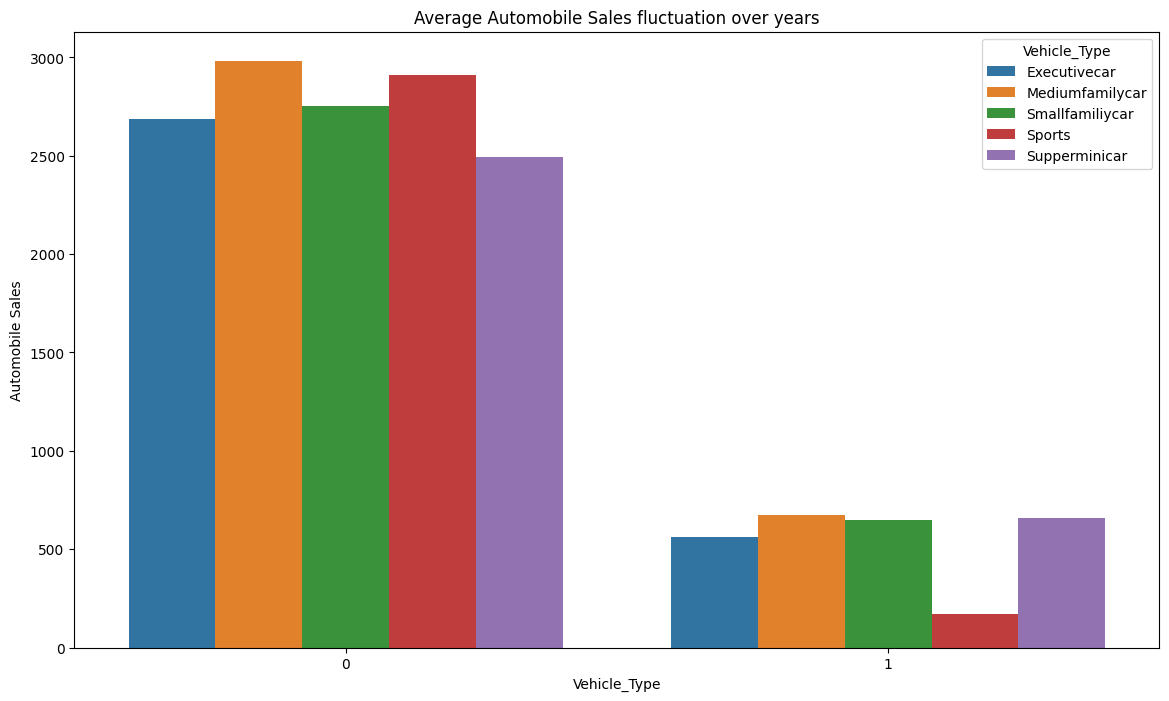

In [ ]:
recession = df[df['Recession']==1]
data4 = df.groupby(['Vehicle_Type','Recession'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(14,8))
sns.barplot(x='Recession',y='Automobile_Sales',hue='Vehicle_Type',data=data4)
plt.xlabel('Vehicle_Type')
plt.ylabel('Automobile Sales')
plt.title('Average Automobile Sales fluctuation over years')

From this plot, we can understand that there is a drastic decline in the overall sales of the automobiles during recession.
However, the most affected type of vehicle is executivecar and sports


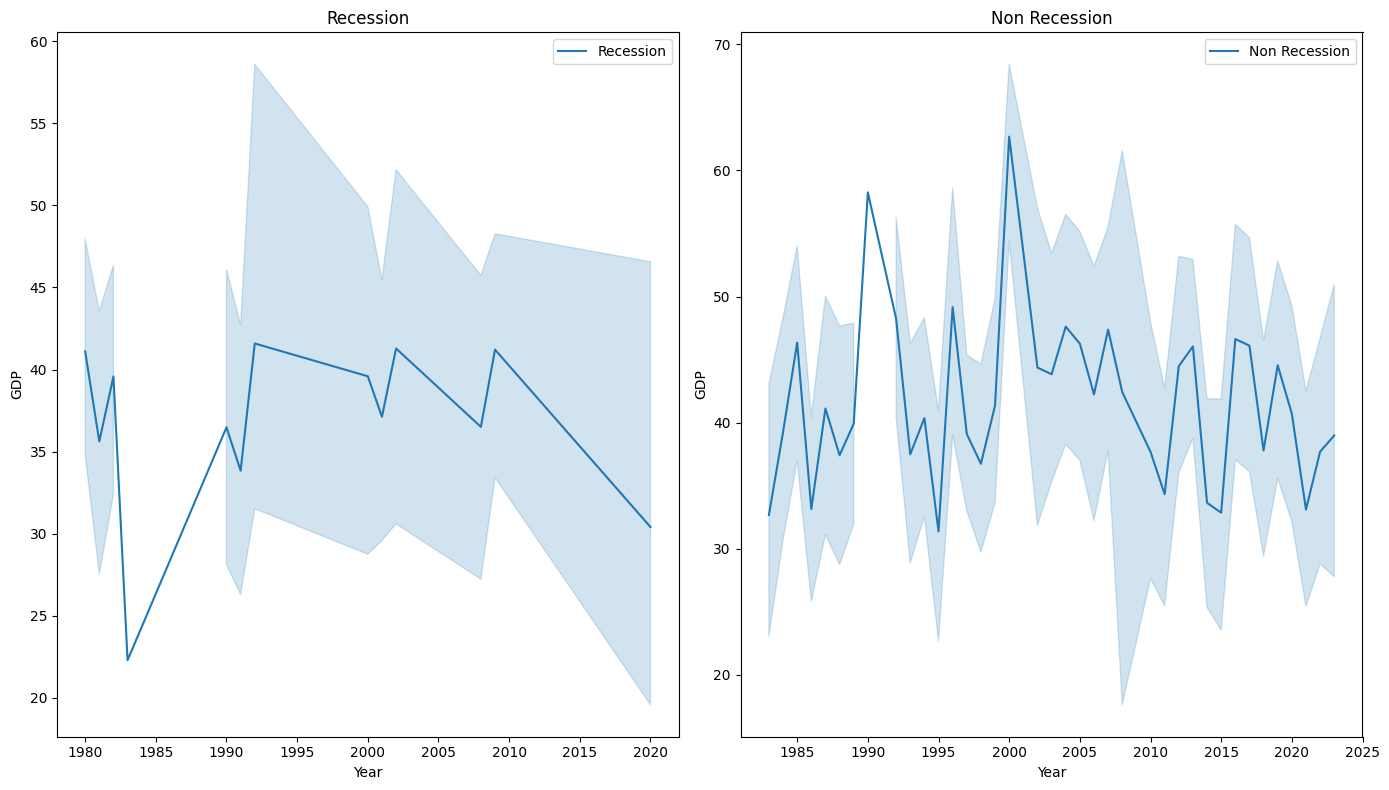

In [ ]:
rec = df[df['Recession']==1]
nrec = df[df['Recession']==0]
fig = plt.figure(figsize=(14,8))
sb1 = fig.add_subplot(1,2,1)
sb2 = fig.add_subplot(1,2,2)
sb1.set_title('Recession')
sb2.set_title('Non Recession')
sns.lineplot(x='Year',y='GDP',ax = sb1,label='Recession',data=rec)
sns.lineplot(x='Year',y='GDP',ax = sb2,label='Non Recession',data=nrec)
sb1.set_xlabel('Year')
sb1.set_ylabel('GDP')
sb2.set_xlabel('Year')
sb2.set_ylabel('GDP')
plt.tight_layout()
plt.show()onlinefoods

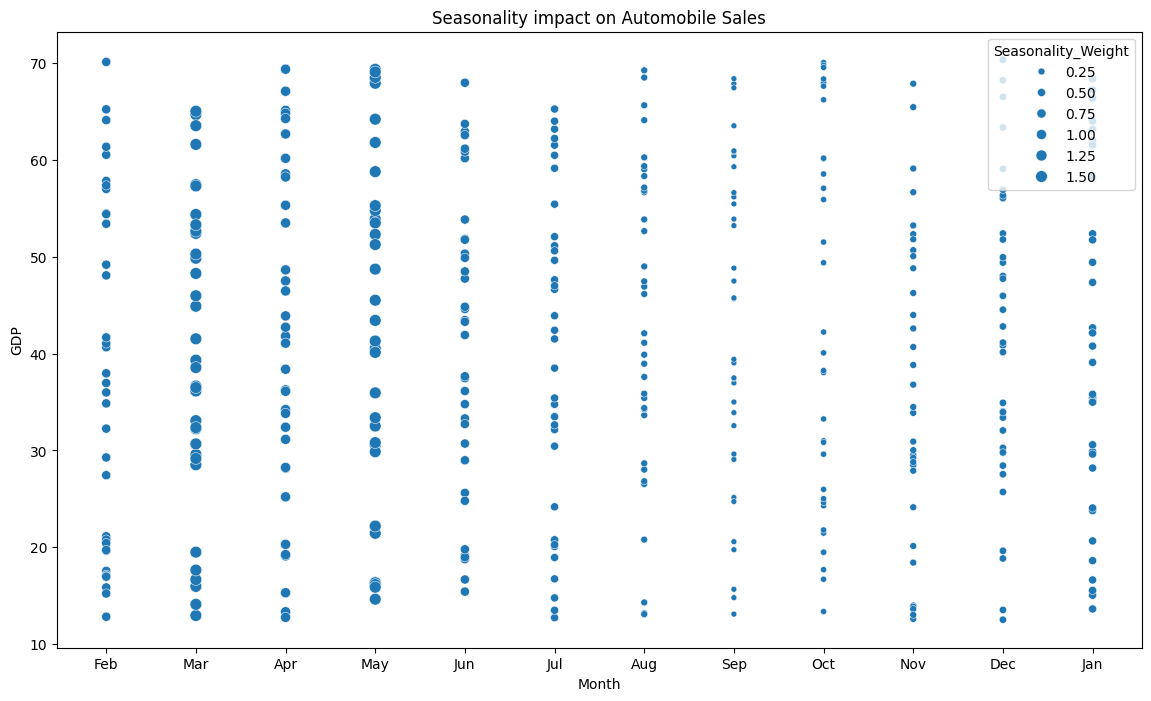

In [ ]:
data5 = df[df['Recession']==0])
size = data5['Seasonality_Weight']
plt.figure(figsize=(14,8))
sns.scatterplot(x='Month',y='GDP',data=data5,size=size)
plt.xlabel('Month')
plt.ylabel('GDP')
plt.title('Seasonality impact on Automobile Sales')
plt.show()

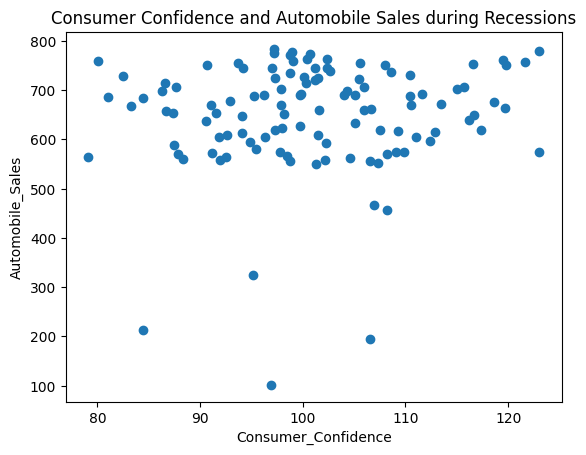

In [ ]:
data6 = df[df['Recession']==1]
plt.scatter(data6['Consumer_Confidence'],data6['Automobile_Sales'])
plt.title('Consumer Confidence and Automobile Sales during Recessions')
plt.xlabel('Consumer_Confidence')
plt.ylabel('Automobile_Sales')
plt.show()

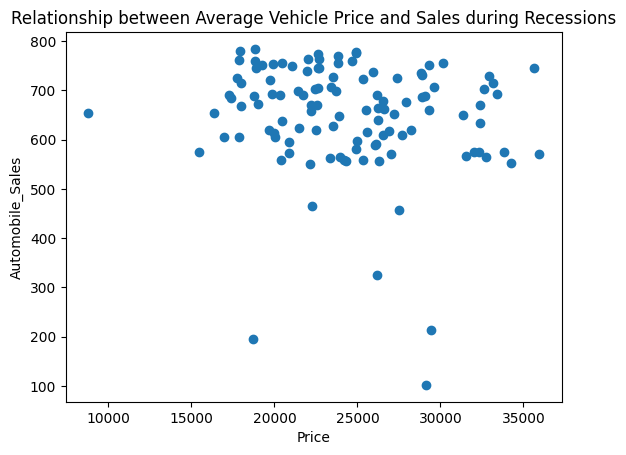

In [ ]:
plt.scatter(data6['Price'],data6['Automobile_Sales'])
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')
plt.xlabel('Price')
plt.ylabel('Automobile_Sales')
plt.show()

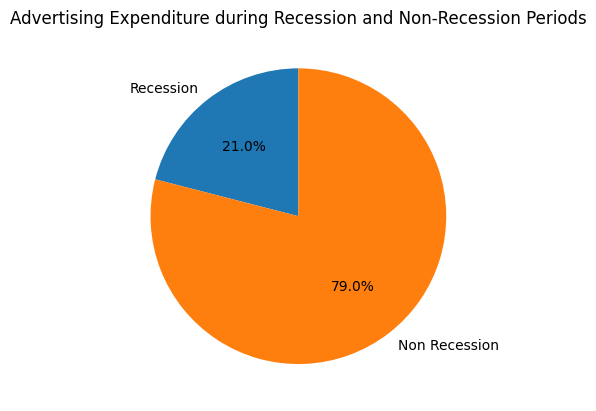

In [ ]:
r1 = rec['Advertising_Expenditure'].sum()
r2 = nrec['Advertising_Expenditure'].sum()
plt.pie([r1,r2],labels=['Recession','Non Recession'],autopct='%1.1f%%',startangle=90)
plt.title('Advertising Expenditure during Recession and Non-Recession Periods')
plt.show()

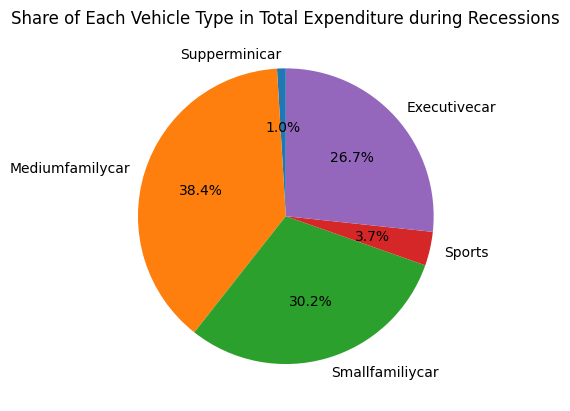

In [ ]:
r1 = rec.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
plt.pie(r1,labels=df.Vehicle_Type.unique(),autopct='%1.1f%%',startangle=90)
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')
plt.show()

Text(0.5, 1.0, 'Effect of Unemployment Rate on Vehicle Type and Sales')

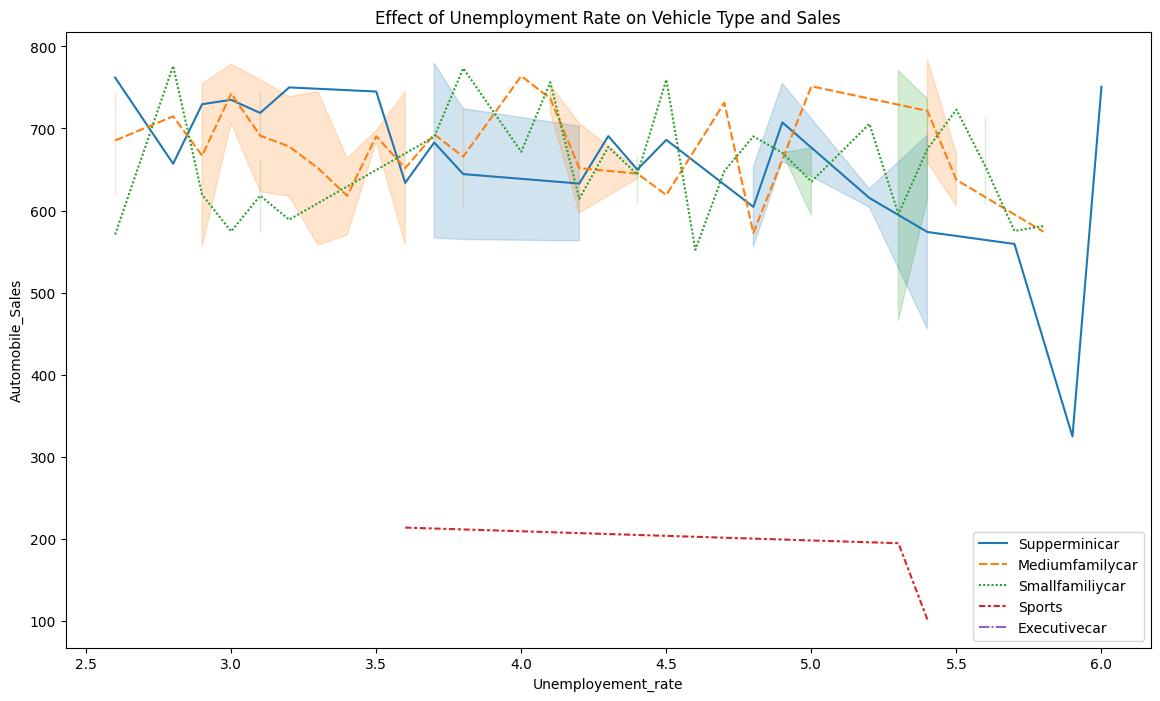

In [ ]:
plt.figure(figsize=(14,8))
sns.lineplot(data=rec,x= 'unemployment_rate',y='Automobile_Sales',hue='Vehicle_Type',style='Vehicle_Type')
plt.xlabel('Unemployement_rate')
plt.ylabel('Automobile_Sales')
plt.legend(loc='lower right')
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')